In [572]:
import re
import pandas as pd

In [573]:
import pandas as pd

# Load adult.data
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adult_data = pd.read_csv('adult.data', names=columns, na_values=' ?', skipinitialspace=True)

# Load adult.test
adult_test = pd.read_csv('adult.test', names=columns, na_values=' ?', skipinitialspace=True, skiprows=1) 
# Combine both datasets
Data_set = pd.concat([adult_data, adult_test], ignore_index=True)
Data_set.reset_index(drop=True,inplace=True)
Data_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [574]:
print("No of rows in dataset before preprocessing : ", len(Data_set))

No of rows in dataset before preprocessing :  48842


### Find duplicates

In [575]:
Data_set.duplicated().values.any()

True

In [576]:
print("Duplicate Rows except first occurrence:")

duplicates = Data_set[Data_set.duplicated()]
duplicates

Duplicate Rows except first occurrence:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### Drop duplicates

In [577]:
# Drop duplicates
Data_set_no_duplicates = Data_set.drop_duplicates()
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [578]:
print("No of rows in dataset after removing duplicates : ", len(Data_set_no_duplicates))

No of rows in dataset after removing duplicates :  48813


### Handle categorical variables

In [579]:
# from sklearn.preprocessing import LabelEncoder


# label_encoder = LabelEncoder()
# Data_set_no_duplicates = Data_set_no_duplicates.copy()  # Create a copy of the DataFrame
# Data_set_no_duplicates['income'] = label_encoder.fit_transform(Data_set_no_duplicates['income'])


In [580]:
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


<Figure size 10000x5000 with 0 Axes>

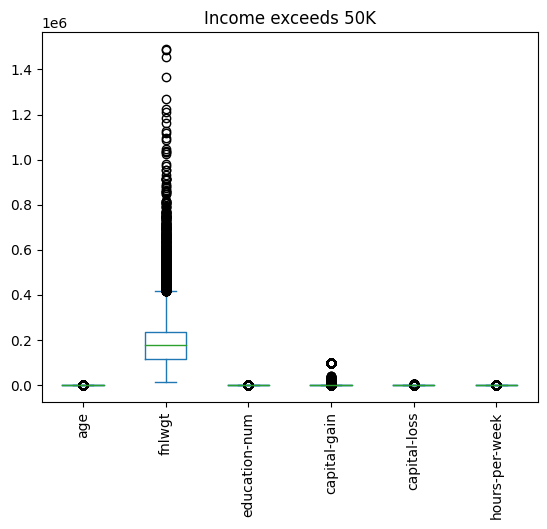

In [581]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(100, 50))
Data_set_no_duplicates.plot.box(title='Income exceeds 50K',rot=90)

plt.show()

### Finding null values in the dataset

In [603]:
# Find rows containing '?'
null_values = Data_set_no_duplicates.isin(['?']).any(axis=1)

# Count the number of rows with '?'
no_null_values = null_values.sum()
print("Number of rows containing '?' before dropping:", no_null_values)

# Drop rows with '?'
null_df2 = Data_set_no_duplicates[~null_values]

# Check the number of rows after dropping
print("Number of rows in dataset after dropping rows with '?':", len(null_df2))

null_df2


Number of rows containing '?' before dropping: 3619
Number of rows in dataset after dropping rows with '?': 45194


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Removing all the null values

In [604]:
null_no_df2 = null_df2.dropna()
null_no_df2=null_df2.dropna(axis=0)

# Reset index after drop
null_no_df2=null_df2.dropna().reset_index(drop=True)

null_df2 = null_no_df2
null_no_df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Summary of dataset before performing standard scalar

In [605]:
null_no_df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45194.000000,4.519400e+04,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1.897379e+05,10.119109,1102.112736,88.650308,40.941209
std,13.215806,1.056407e+05,2.552057,7508.705003,405.075515,12.006449
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173922e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Standard Deviation of each numeric column:
age                   13.215806
fnlwgt            105640.654414
education-num          2.552057
capital-gain        7508.705003
capital-loss         405.075515
hours-per-week        12.006449
dtype: float64


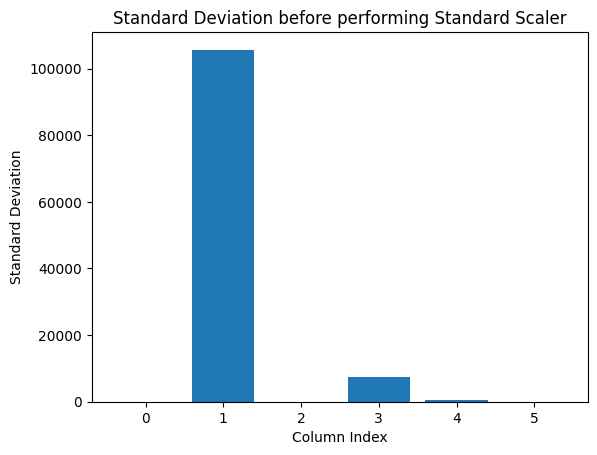

In [606]:
# Select only numeric columns
numeric_columns = null_no_df2.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of numeric columns
std_deviation_numeric = numeric_columns.std()

# Display the standard deviation for each numeric column
print("Standard Deviation of each numeric column:")
print(std_deviation_numeric)

plt.bar(range(len(std_deviation_numeric)), std_deviation_numeric)
plt.title("Standard Deviation before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()


Mean of each numeric column:
age                   38.551755
fnlwgt            189737.853056
education-num         10.119109
capital-gain        1102.112736
capital-loss          88.650308
hours-per-week        40.941209
dtype: float64


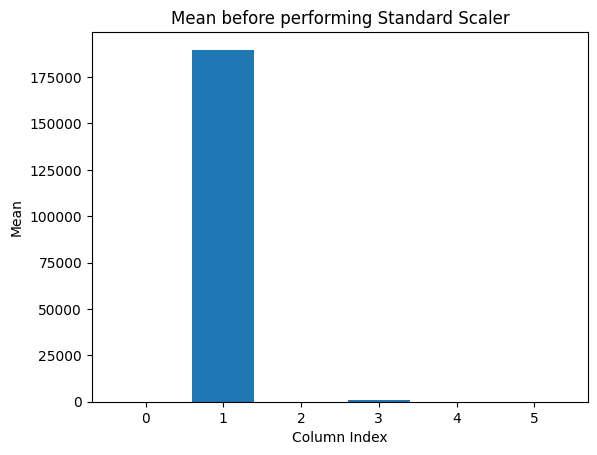

In [607]:
# Calculate the mean of numeric columns
mean_values = numeric_columns.mean()

# Display the mean for each numeric column
print("Mean of each numeric column:")
print(mean_values)

# Plot the mean of all columns
plt.bar(range(len(mean_values)), mean_values)
plt.title("Mean before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()

In [599]:
# Standardize numeric columns
scaler = StandardScaler()
null_df2[numeric_columns.columns] = scaler.fit_transform(null_df2[numeric_columns.columns])

# Check the number of rows after standardization
print("Number of rows in dataset after standardization:", len(null_df2))
null_df2


Number of rows in dataset after standardization: 45194


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.033918,State-gov,-1.062310,Bachelors,1.128863,Never-married,Adm-clerical,Not-in-family,White,Male,0.142754,-0.218851,-0.078393,United-States,0
1,0.866264,Self-emp-not-inc,-1.007453,Bachelors,1.128863,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146780,-0.218851,-2.327209,United-States,0
2,-0.041750,Private,0.245251,HS-grad,-0.438517,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146780,-0.218851,-0.078393,United-States,0
3,1.093267,Private,0.425818,11th,-1.222207,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146780,-0.218851,-0.078393,United-States,0
4,-0.798428,Private,1.407344,Bachelors,1.128863,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146780,-0.218851,-0.078393,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,-0.420089,Private,0.525118,Bachelors,1.128863,Never-married,Prof-specialty,Own-child,White,Male,-0.146780,-0.218851,-0.078393,United-States,1
45190,0.033918,Private,0.243102,Bachelors,1.128863,Divorced,Prof-specialty,Not-in-family,White,Female,-0.146780,-0.218851,-0.411551,United-States,1
45191,-0.041750,Private,1.753560,Bachelors,1.128863,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.146780,-0.218851,0.754502,United-States,1
45192,0.412257,Private,-1.001963,Bachelors,1.128863,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.579719,-0.218851,-0.078393,United-States,1


In [588]:
# Calculate the standard deviation of each column after Min-Max scaling
scaled_std_values = scaled_numeric_columns.std(axis=0)

# Display the standard deviation for each scaled numeric column
print("Standard deviation of each scaled numeric column:")
print(scaled_std_values)


Standard deviation of each scaled numeric column:
[0.18103643 0.07152747 0.17013527 0.07508697 0.09299151 0.12251343]


In [589]:
# Calculate the mean of each scaled numeric column
mean_scaled_numeric = null_df2[numeric_columns.columns].mean()

# Display the mean for each scaled numeric column
print("Mean of each scaled numeric column:")
print(mean_scaled_numeric)


Mean of each scaled numeric column:
age                   38.551755
fnlwgt            189737.853056
education-num         10.119109
capital-gain        1102.112736
capital-loss          88.650308
hours-per-week        40.941209
dtype: float64


In [600]:
# Calculate the standard deviation of each column after Min-Max scaling
scaled_std_values = scaled_numeric_columns.std(axis=0)

# Display the standard deviation for each scaled numeric column
print("Standard deviation of each scaled numeric column:")
print(scaled_std_values)


Standard deviation of each scaled numeric column:
[0.18103643 0.07152747 0.17013527 0.07508697 0.09299151 0.12251343]


### Performing PCA to the dataset

In [591]:
# from sklearn.decomposition import PCA

# # Initialize PCA
# pca = PCA()

# # Fit PCA on scaled numeric columns
# pca.fit(scaled_numeric_columns)

# # Get explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_

# # Cumulative explained variance ratio
# cumulative_variance_ratio = explained_variance_ratio.cumsum()

# # Find the number of components to explain a certain threshold of variance (e.g., 95%)
# target_variance = 0.95
# n_components = (cumulative_variance_ratio < target_variance).sum() + 1  # Add 1 for zero-based indexing

# print(f"Number of components to explain {target_variance * 100:.2f}% of variance: {n_components}")


In [592]:
# from sklearn.decomposition import PCA

# # Initialize PCA with the determined number of components
# pca = PCA(n_components=n_components)

# # Perform PCA on scaled numeric columns
# pca_result = pca.fit_transform(scaled_numeric_columns)

# # Concatenate original numeric columns DataFrame with PCA-transformed DataFrame
# merged_df = pd.concat([pca_df,numeric_columns_only.reset_index(drop=True)], axis=1)

# # Print the entire DataFrame
# print("Entire DataFrame after PCA:")

# merged_df


In [593]:
# print(pca.explained_variance_)


In [594]:
# print(pca.components_)

In [595]:
# summary_after_scaling.columns

# Build the predictive model using Random forest


### Splitting rhe dataset into the training set and testing set

In [596]:
# print(merged_df.columns)


In [597]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = merged_df.drop(columns='income')  # Replace 'target_column' with the name of your target column
y = merged_df['income']  # Replace 'target_column' with the name of your target column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


KeyError: "['income'] not found in axis"

### Fitting classifier into training set

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical features in the training set
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# Transform the categorical features in the test set
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Concatenate the encoded categorical features with the numeric features
X_train_final = np.concatenate([X_train_encoded, X_train[numeric_columns.columns]], axis=1)
X_test_final = np.concatenate([X_test_encoded, X_test[numeric_columns.columns]], axis=1)

# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_final, y_train)


KeyError: "None of [Index(['workclass', 'education', 'marital-status', 'occupation',\n       'relationship', 'race', 'sex', 'native-country'],\n      dtype='object')] are in the [columns]"

### Accuracy of testing dataset

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.5270494523730501

### Accuracy of Train dataset

In [ ]:
y_train_pred = rf_classifier.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.9995021435486101

### Summary of the test dataset

In [ ]:
# Assuming you have scikit-learn installed, you can use metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report

classification_rep = classification_report(y_test, y_test_pred)
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.68      4532
           1       0.26      0.08      0.13      2246
           2       0.47      0.53      0.50      1498
           3       0.21      0.07      0.10       763

    accuracy                           0.53      9039
   macro avg       0.38      0.38      0.35      9039
weighted avg       0.45      0.53      0.47      9039



### Confusion matrix

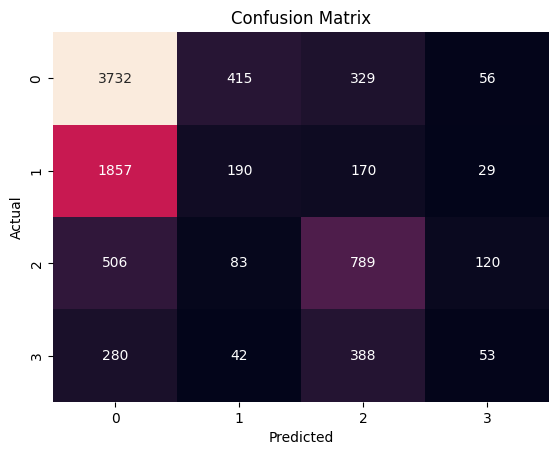

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the confusion matrix on the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
